# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

--------------------------------------------------------------

## 1.데이터 가져오기

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
display(train.head())
type(train)
train.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


--------------------------------------------------------------

## 2.datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [4]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

--------------------------------------------------------------

## 3.year, month, day, hour, minute, second 데이터 개수 시각화하기

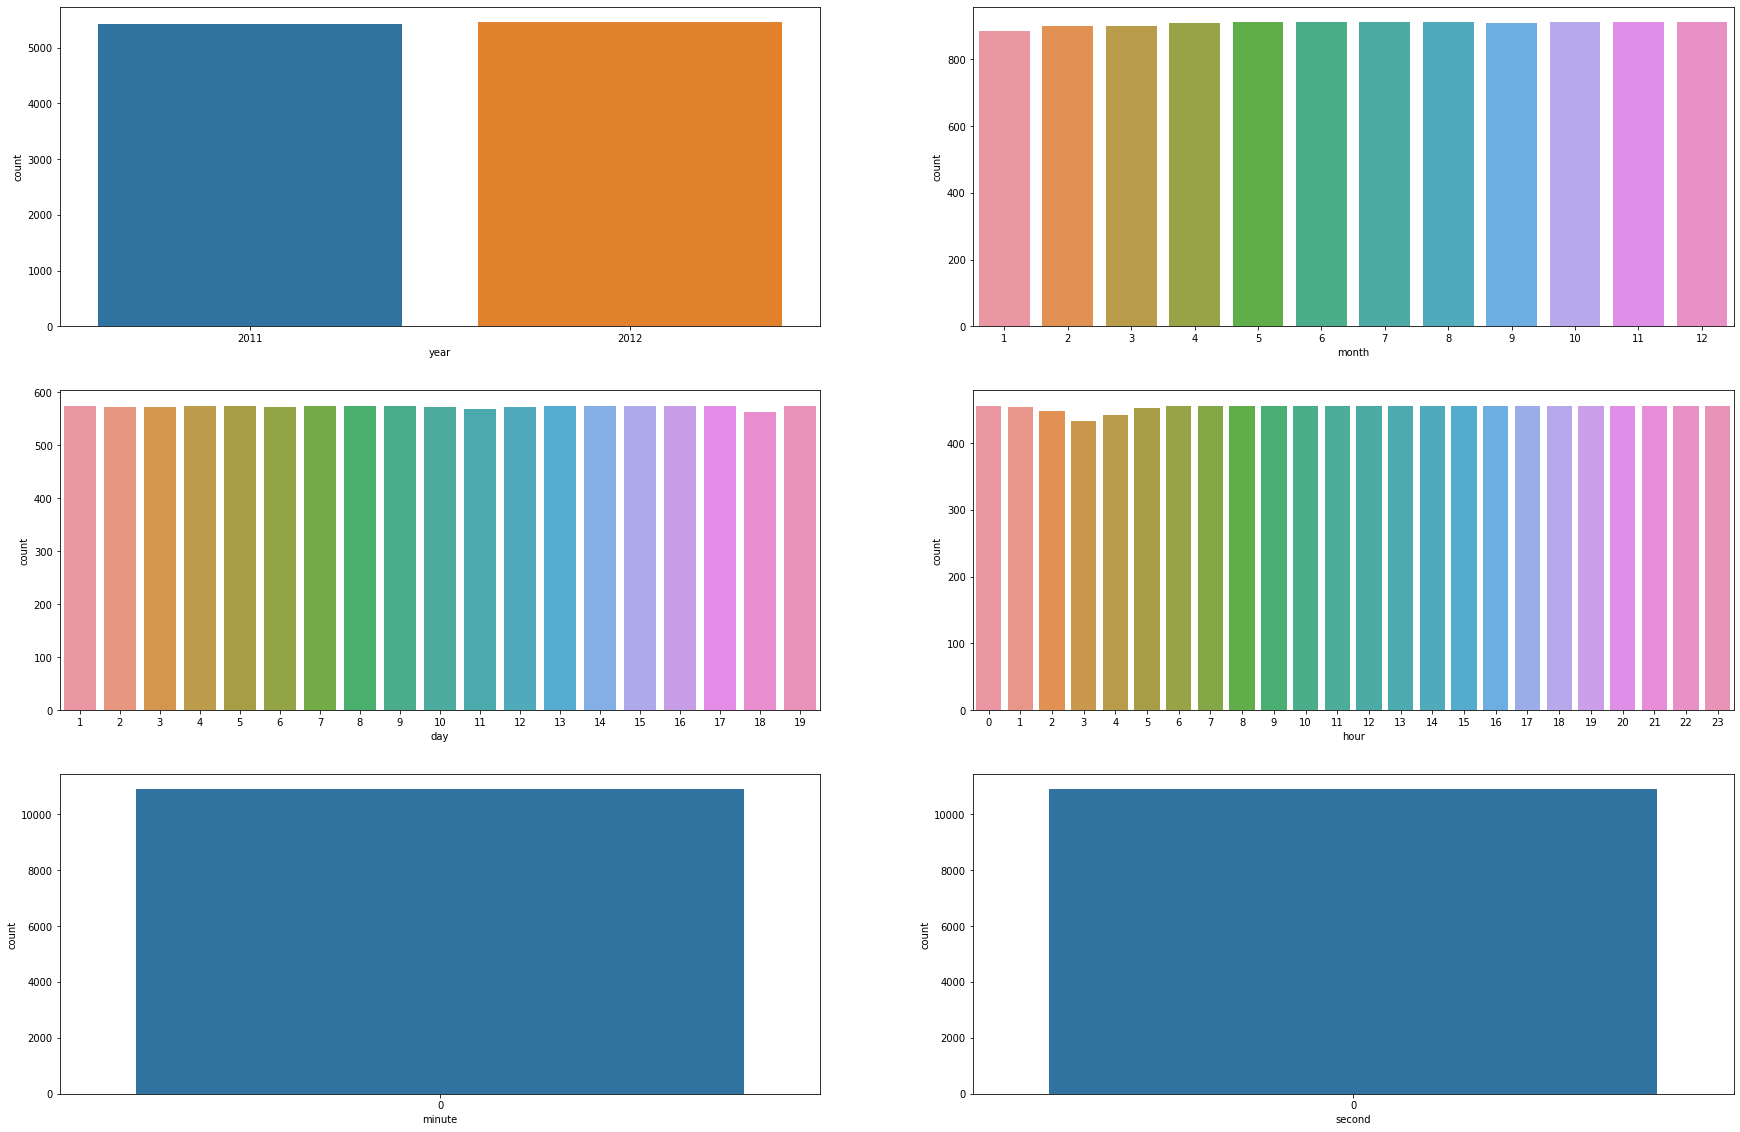

In [5]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
sns.countplot(x='year', data=train)

plt.subplot(3,2,2)
sns.countplot(x='month', data=train)

plt.subplot(3,2,3)
sns.countplot(x='day', data=train)

plt.subplot(3,2,4)
sns.countplot(x='hour', data=train)

plt.subplot(3,2,5)
sns.countplot(x='minute', data=train)

plt.subplot(3,2,6)
sns.countplot(x='second', data=train)

plt.show()

--------------------------------------------------------------

## 4.X, y 컬럼 선택 및 train/test 데이터 분리

In [6]:
train.corrwith(train['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
minute             NaN
second             NaN
dtype: float64

### -. 새로 생성된 컬럼을 포함하여 필요한 컬럼들을 학습하기 위해 발췌

In [7]:
X = train[['season','weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour',]].values
y = train[['count']].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

--------------------------------------------------------------

## 5.LinearRegression 모델 학습

In [9]:
from sklearn.linear_model import LinearRegression

bike_model = LinearRegression()
bike_model.fit(X_train, y_train)

LinearRegression()

--------------------------------------------------------------

## 6.학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [10]:
bike_pred = bike_model.predict(X_test)
print(bike_pred)

[[ 86.56270408]
 [166.9046354 ]
 [260.48718619]
 ...
 [ -6.87717189]
 [152.63404399]
 [201.82099274]]


In [11]:
print(y_test)

[[  4]
 [276]
 [120]
 ...
 [ 99]
 [357]
 [ 80]]


In [12]:
from sklearn.metrics import mean_squared_error
bike_mse = mean_squared_error(y_test, bike_pred)
print('MSE 값 : ', bike_mse)
bike_rmse = mean_squared_error(y_test, bike_pred, squared = False)
print('RMSE 값 : ',bike_rmse)

MSE 값 :  20412.011241695473
RMSE 값 :  142.87061013971862


--------------------------------------------------------------

## 7.x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     2178 non-null   float64
 1   weather    2178 non-null   float64
 2   temp       2178 non-null   float64
 3   atemp      2178 non-null   float64
 4   humidity   2178 non-null   float64
 5   windspeed  2178 non-null   float64
 6   year       2178 non-null   float64
 7   month      2178 non-null   float64
 8   hour       2178 non-null   float64
dtypes: float64(9)
memory usage: 153.3 KB


<AxesSubplot:title={'center':'temp and real count'}, xlabel='temp', ylabel='count'>

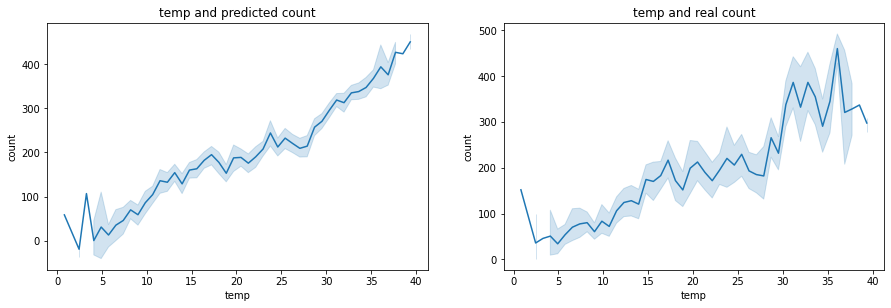

In [13]:
df_X_test = pd.DataFrame(X_test, columns=['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour',] )
df_X_test.info()
df_y_pred = pd.DataFrame(bike_pred, columns=['count'])
df_y_test = pd.DataFrame(y_test, columns=['count'])

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('temp and predicted count')
sns.lineplot(x=df_X_test['temp'], y=df_y_pred['count'])

plt.subplot(2,2,2)
plt.title('temp and real count')
sns.lineplot(x=df_X_test['temp'], y=df_y_test['count'])

plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
plt.title('humidity and predicted count')
sns.lineplot(x=df_X_test['humidity'], y=df_y_pred['count'])

plt.subplot(2,2,4)
plt.title('humidity and real count')
sns.lineplot(x=df_X_test['humidity'], y=df_y_test['count'])

plt.show()

## References

## - 같은 멤버인 박수경님 깃허브 프로젝트 내용 코드 복사

# 회고

## 예시가 없는 프로젝트는 처음이라 너무 어려웠고, 3~4주차까지는 어느정도 수업 진도를 밤새가며 공부하면서 진도를 따라갔으나, 지금은 수업내용이 너무 많아 공부를 해도 수업 속도를 못따라가는 현상이 발생되어 프로젝트에 대한 내용을 대부분 복사해서 붙이는(이해는 하나도 못하고...)상황이라 답답한 프로젝트였음.

### 당뇨병 수치를 구하는 방법인 프로젝트를 진행하는 건데 예시가 없으면 어느정도 이해라도 하게끔 수업 내용 설명을 했으면 좋을듯.

### 7번 내용 기울기를 구하는 gradient 함수 구현하기부터 복붙을 해도 에러가 계속 발생되어 잠을 한숨도 못잠.(새벽에 누구한테 물어볼수도 없고 디스코드에 새벽에 물어보는 건 예의가 아닌거 같아 도움을 얻을곳이 없음)

### 같은 그루인 박수경님의 깃허브 프로젝트 링크주소를 보고 거의 따라하듯이(이해는 하나도 못하고...) 프로젝트 작성

### 지난번 프로젝트도 거의 이해를 못하고 해서 아쉬운게 많았는데 이번 프로젝트는 전체적으로 거의 이해를 하지 못하고 넘어가는 거 같아 많은 고민을 하게 됨.